In [2]:
import matplotlib.pyplot as plt
import re
from collections import Counter

# Set matplotlib to support Gujarati fonts
# plt.rcParams['font.family'] = ['DejaVu Sans', 'Noto Sans Gujarati', 'Arial Unicode MS']
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [3]:
def load_tokenized_data():
    """Load the tokenized words from the file created in Assignment 1"""
    all_words = []
    
    try:
        # Load from the words file created in Assignment 1
        with open('../Assignment_1/gujarati_words.txt', 'r', encoding='utf-8') as f:
            all_words = [line.strip() for line in f if line.strip()]
        print(f"Loaded {len(all_words):,} words from Assignment 1")
        
    except FileNotFoundError:
        print("gujarati_words.txt not found. Please run Assignment 1 first or provide the tokenized data.")
    
    return all_words

In [4]:
# Load the tokenized words
all_words = load_tokenized_data()

Loaded 115,577 words from Assignment 1


In [5]:
def create_frequency_distribution(words):
    """Create frequency distribution manually without using Counter or similar libraries"""
    freq_dict = {}
    
    # Count frequency of each word
    for word in words:
        if word in freq_dict:
            freq_dict[word] += 1
        else:
            freq_dict[word] = 1
    
    return freq_dict

def sort_frequency_dict(freq_dict):
    """Sort frequency dictionary by frequency in descending order"""
    # Convert to list of tuples and sort manually
    word_freq_list = []
    for word, freq in freq_dict.items():
        word_freq_list.append((word, freq))
    
    # Manual sorting (bubble sort for demonstration)
    n = len(word_freq_list)
    for i in range(n):
        for j in range(0, n - i - 1):
            if word_freq_list[j][1] < word_freq_list[j + 1][1]:
                word_freq_list[j], word_freq_list[j + 1] = word_freq_list[j + 1], word_freq_list[j]
    
    return word_freq_list

In [6]:
# Create frequency distribution
print("Creating frequency distribution...")
freq_dict = create_frequency_distribution(all_words)
sorted_freq_list = sort_frequency_dict(freq_dict)

print(f"Total unique words: {len(freq_dict):,}")
print(f"Total word occurrences: {sum(freq_dict.values()):,}")

# Show top 10 most frequent words
print("\nTop 10 most frequent words:")
for i, (word, freq) in enumerate(sorted_freq_list[:10]):
    print(f"{i+1:2d}. {word}: {freq}")

Creating frequency distribution...
Total unique words: 25,237
Total word occurrences: 115,577

Top 10 most frequent words:
 1. .: 6628
 2. છે: 4430
 3. ,: 3399
 4. અને: 1993
 5. આ: 1263
 6. કે: 1061
 7. પણ: 929
 8. માટે: 895
 9. -: 707
10. એક: 675


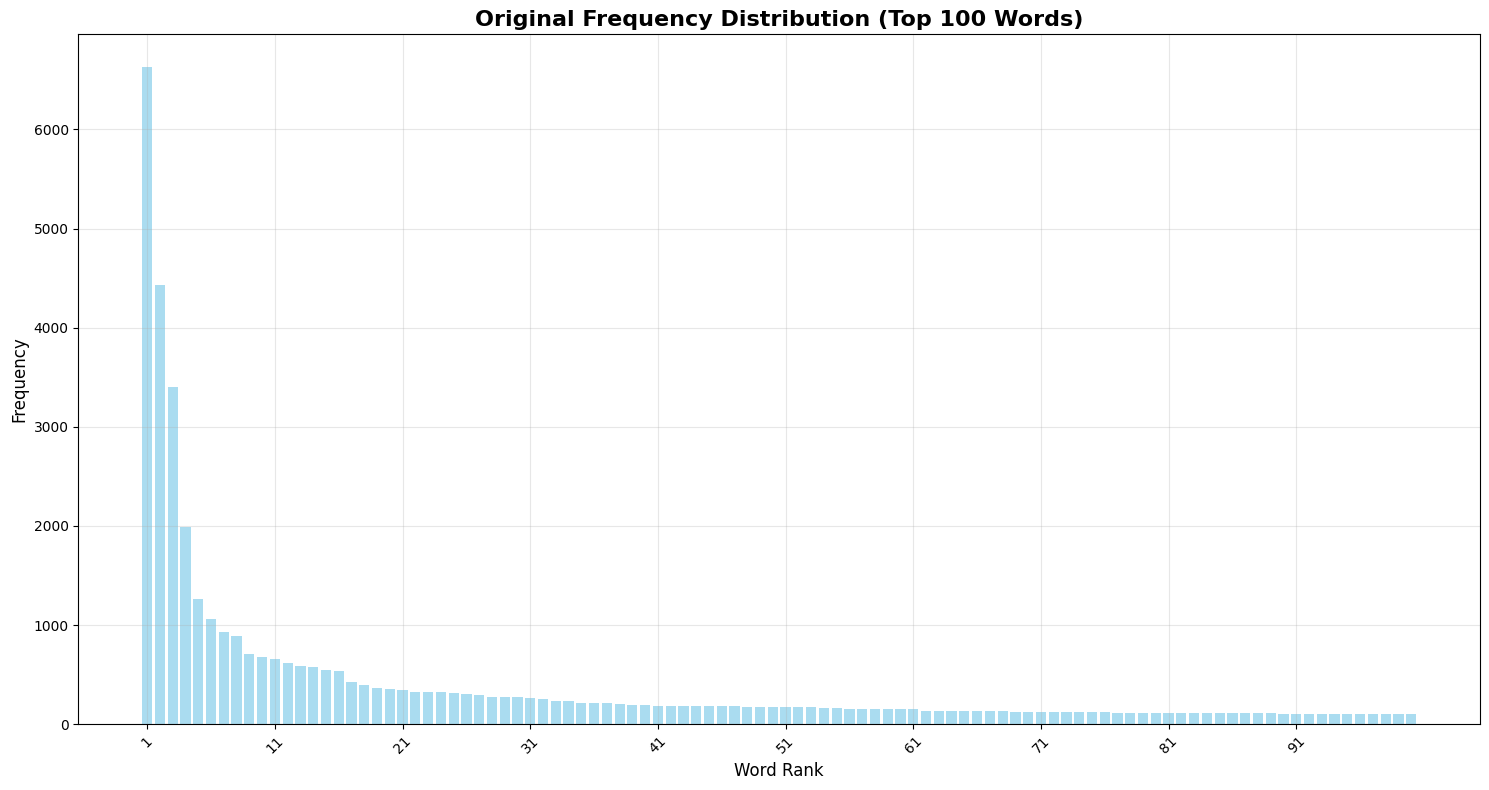


Statistics for Original Frequency Distribution:
Highest frequency: 6628
Lowest frequency in top 100: 100
Average frequency: 404.39


In [7]:
def plot_frequency_distribution(word_freq_list, title, num_words=100):
    """Plot frequency distribution for top N words"""
    # Check if word_freq_list is empty
    if not word_freq_list:
        print(f"Warning: No words to plot for {title}")
        return
    
    # Extract top N words and their frequencies
    top_words = word_freq_list[:num_words]
    if not top_words:
        print(f"Warning: No words available after filtering for {title}")
        return
        
    words = [item[0] for item in top_words]
    frequencies = [item[1] for item in top_words]
    
    plt.figure(figsize=(15, 8))
    bars = plt.bar(range(len(words)), frequencies, color='skyblue', alpha=0.7)
    
    plt.title(f'{title} (Top {min(num_words, len(words))} Words)', fontsize=16, fontweight='bold')
    plt.xlabel('Word Rank', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    # Set x-axis labels for every 10th word to avoid overcrowding
    step = max(1, len(words) // 10) if len(words) > 0 else 1
    plt.xticks(range(0, len(words), step), 
               [f'{i+1}' for i in range(0, len(words), step)], 
               rotation=45)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print some statistics
    print(f"\nStatistics for {title}:")
    if frequencies:
        print(f"Highest frequency: {max(frequencies)}")
        print(f"Lowest frequency in top {min(num_words, len(words))}: {min(frequencies)}")
        print(f"Average frequency: {sum(frequencies)/len(frequencies):.2f}")
    else:
        print("No frequencies to display")

# Plot original frequency distribution
plot_frequency_distribution(sorted_freq_list, "Original Frequency Distribution", 100)


In [8]:
def identify_stopwords_by_threshold(word_freq_list, threshold_percentile):
    """Identify stop words based on frequency threshold"""
    # Calculate threshold based on percentile
    frequencies = [item[1] for item in word_freq_list]
    frequencies.sort(reverse=True)
    
    threshold_index = int(len(frequencies) * threshold_percentile / 100)
    threshold_freq = frequencies[threshold_index] if threshold_index < len(frequencies) else 1
    
    # Words with frequency >= threshold are considered stop words
    stopwords = []
    for word, freq in word_freq_list:
        if freq >= threshold_freq:
            stopwords.append(word)
    
    return stopwords, threshold_freq

def remove_stopwords(word_freq_list, stopwords):
    """Remove stop words from frequency list"""
    filtered_list = []
    for word, freq in word_freq_list:
        if word not in stopwords:
            filtered_list.append((word, freq))
    
    return filtered_list

# Define three different thresholds
thresholds = [95, 90, 85]  # Top 5%, 10%, 15% most frequent words as stopwords

print("Identifying stop words at different thresholds...")

for threshold in thresholds:
    stopwords, threshold_freq = identify_stopwords_by_threshold(sorted_freq_list, threshold)
    print(f"\nThreshold {threshold}% (freq >= {threshold_freq}):")
    print(f"Stop words identified: {len(stopwords)}")
    print(f"Stop words: {stopwords[:20]}...") 

Identifying stop words at different thresholds...

Threshold 95% (freq >= 1):
Stop words identified: 25237
Stop words: ['.', 'છે', ',', 'અને', 'આ', 'કે', 'પણ', 'માટે', '-', 'એક', 'કરી', 'પર', 'હતી', 'જ', 'સાથે', 'તે', 'તો', 'હતો', 'આવી', 'કરવામાં']...

Threshold 90% (freq >= 1):
Stop words identified: 25237
Stop words: ['.', 'છે', ',', 'અને', 'આ', 'કે', 'પણ', 'માટે', '-', 'એક', 'કરી', 'પર', 'હતી', 'જ', 'સાથે', 'તે', 'તો', 'હતો', 'આવી', 'કરવામાં']...

Threshold 85% (freq >= 1):
Stop words identified: 25237
Stop words: ['.', 'છે', ',', 'અને', 'આ', 'કે', 'પણ', 'માટે', '-', 'એક', 'કરી', 'પર', 'હતી', 'જ', 'સાથે', 'તે', 'તો', 'હતો', 'આવી', 'કરવામાં']...


In [9]:
def analyze_and_plot_threshold(word_freq_list, threshold):
    """Analyze and plot for a specific threshold"""
    stopwords, threshold_freq = identify_stopwords_by_threshold(word_freq_list, threshold)
    filtered_freq_list = remove_stopwords(word_freq_list, stopwords)
    
    print(f"\n{'='*50}")
    print(f"THRESHOLD {threshold}% ANALYSIS")
    print(f"{'='*50}")
    print(f"Frequency threshold: >= {threshold_freq}")
    print(f"Stop words removed: {len(stopwords)}")
    print(f"Remaining unique words: {len(filtered_freq_list)}")
    
    if len(stopwords) > 0:
        print(f"Removed stop words: {', '.join(stopwords[:10])}...")
    
    # Plot the filtered distribution
    plot_frequency_distribution(filtered_freq_list, 
                              f"After Removing Stop Words (Threshold {threshold}%)", 
                              min(100, len(filtered_freq_list)))
    
    return filtered_freq_list, stopwords

# Analyze all three thresholds
results = {}
for threshold in thresholds:
    filtered_list, stopwords = analyze_and_plot_threshold(sorted_freq_list, threshold)
    results[threshold] = {
        'filtered_list': filtered_list,
        'stopwords': stopwords,
        'remaining_words': len(filtered_list)
    }


THRESHOLD 95% ANALYSIS
Frequency threshold: >= 1
Stop words removed: 25237
Remaining unique words: 0
Removed stop words: ., છે, ,, અને, આ, કે, પણ, માટે, -, એક...

THRESHOLD 90% ANALYSIS
Frequency threshold: >= 1
Stop words removed: 25237
Remaining unique words: 0
Removed stop words: ., છે, ,, અને, આ, કે, પણ, માટે, -, એક...

THRESHOLD 85% ANALYSIS
Frequency threshold: >= 1
Stop words removed: 25237
Remaining unique words: 0
Removed stop words: ., છે, ,, અને, આ, કે, પણ, માટે, -, એક...



SUMMARY COMPARISON
Threshold    Stopwords    Remaining    Reduction%  
------------------------------------------------
Original     0            25237        0.0%        
95%         25237        0            100.0      %
90%         25237        0            100.0      %
85%         25237        0            100.0      %


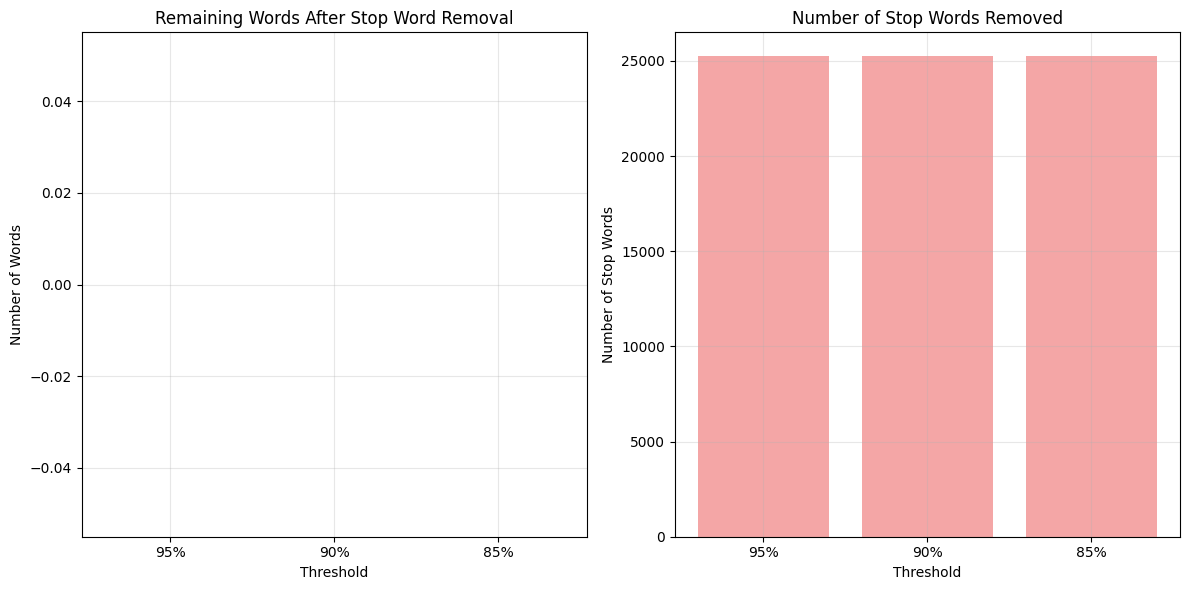

In [10]:
def create_comparison_summary(original_freq_list, results):
    """Create a summary comparison of all thresholds"""
    print(f"\n{'='*60}")
    print("SUMMARY COMPARISON")
    print(f"{'='*60}")
    
    print(f"{'Threshold':<12} {'Stopwords':<12} {'Remaining':<12} {'Reduction%':<12}")
    print("-" * 48)
    
    original_count = len(original_freq_list)
    print(f"{'Original':<12} {'0':<12} {original_count:<12} {'0.0%':<12}")
    
    for threshold in sorted(results.keys(), reverse=True):
        stopword_count = len(results[threshold]['stopwords'])
        remaining = results[threshold]['remaining_words']
        reduction = (stopword_count / original_count) * 100
        
        print(f"{str(threshold)+'%':<11} {stopword_count:<12} {remaining:<12} {reduction:<11.1f}%")

# Create comparison plot
def plot_comparison(results):
    """Plot comparison of word counts across thresholds"""
    thresholds = sorted(results.keys(), reverse=True)
    remaining_counts = [results[t]['remaining_words'] for t in thresholds]
    stopword_counts = [len(results[t]['stopwords']) for t in thresholds]
    
    plt.figure(figsize=(12, 6))
    
    # Create subplot for remaining words
    plt.subplot(1, 2, 1)
    plt.bar(range(len(thresholds)), remaining_counts, color='lightgreen', alpha=0.7)
    plt.title('Remaining Words After Stop Word Removal')
    plt.xlabel('Threshold')
    plt.ylabel('Number of Words')
    plt.xticks(range(len(thresholds)), [f'{t}%' for t in thresholds])
    plt.grid(True, alpha=0.3)
    
    # Create subplot for removed stopwords
    plt.subplot(1, 2, 2)
    plt.bar(range(len(thresholds)), stopword_counts, color='lightcoral', alpha=0.7)
    plt.title('Number of Stop Words Removed')
    plt.xlabel('Threshold')
    plt.ylabel('Number of Stop Words')
    plt.xticks(range(len(thresholds)), [f'{t}%' for t in thresholds])
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Generate summary and comparison
create_comparison_summary(sorted_freq_list, results)
plot_comparison(results)